In [1]:
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Data.csv', sep=',')[0:2127]
colunas = ['Country Name', 'Country Code','Series Name', 'Series Code','2000', '2001', '2002', '2003','2004', '2005',
           '2013', '2014','2015', '2016', '2017', '2018','2019', '2020', '2021']
var = ['Country Name', 'Country Code','Series Name', 'Series Code']
df.columns = colunas
df = df.melt(id_vars=var).rename(columns={'variable':'Year', 'value':'Value'})

In [3]:
df.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2000,0.0370549371204185
1,Afghanistan,AFG,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,2000,..
2,Afghanistan,AFG,Electricity production from oil sources (% of ...,EG.ELC.PETR.ZS,2000,..
3,Afghanistan,AFG,Electricity production from nuclear sources (%...,EG.ELC.NUCL.ZS,2000,..
4,Afghanistan,AFG,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,2000,..


In [4]:
df[df['Country Code']=='BRA']

,Country Name,Country Code,Series Name,Series Code,Year,Value
208,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2000,1.78882884368111
209,Brazil,BRA,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,2000,8.66785130836032
210,Brazil,BRA,Electricity production from oil sources (% of ...,EG.ELC.PETR.ZS,2000,4.34753948009515
211,Brazil,BRA,Electricity production from nuclear sources (%...,EG.ELC.NUCL.ZS,2000,1.73282508383251
212,Brazil,BRA,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,2000,1.16591671204609
...,...,...,...,...,...,...
29989,Brazil,BRA,Electricity production from nuclear sources (%...,EG.ELC.NUCL.ZS,2021,..
29990,Brazil,BRA,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,2021,..
29991,Brazil,BRA,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,2021,..
29992,Brazil,BRA,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,2021,..


In [5]:
df.dtypes

Country Name    object
Country Code    object
Series Name     object
Series Code     object
Year            object
Value           object
dtype: object

In [6]:
df.loc[df['Value']=='..', 'Value'] = 0

In [7]:
df['Year'] = df['Year'].astype('int')
df['Value'] = df['Value'].astype('float')
df.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2000,0.037055
1,Afghanistan,AFG,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,2000,0.000000
2,Afghanistan,AFG,Electricity production from oil sources (% of ...,EG.ELC.PETR.ZS,2000,0.000000
3,Afghanistan,AFG,Electricity production from nuclear sources (%...,EG.ELC.NUCL.ZS,2000,0.000000
4,Afghanistan,AFG,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,2000,0.000000


In [8]:
df[df['Country Code']=='BRA'].groupby(['Series Name'])['Year'].nunique()

Series Name
CO2 emissions (metric tons per capita)                                15
Electricity production from coal sources (% of total)                 15
Electricity production from hydroelectric sources (% of total)        15
Electricity production from natural gas sources (% of total)          15
Electricity production from nuclear sources (% of total)              15
Electricity production from oil sources (% of total)                  15
Electricity production from oil, gas and coal sources (% of total)    15
GDP per capita (constant 2015 US$)                                    15
Name: Year, dtype: int64

In [9]:
df[(df['Country Code']=='BRA')&(df['Value']<=0)].groupby(['Series Name'])['Year'].unique()

Series Name
CO2 emissions (metric tons per capita)                                                        [2019, 2020, 2021]
Electricity production from coal sources (% of total)                       [2016, 2017, 2018, 2019, 2020, 2021]
Electricity production from hydroelectric sources (% of total)              [2016, 2017, 2018, 2019, 2020, 2021]
Electricity production from natural gas sources (% of total)                [2016, 2017, 2018, 2019, 2020, 2021]
Electricity production from nuclear sources (% of total)              [2015, 2016, 2017, 2018, 2019, 2020, 2021]
Electricity production from oil sources (% of total)                        [2016, 2017, 2018, 2019, 2020, 2021]
Electricity production from oil, gas and coal sources (% of total)          [2016, 2017, 2018, 2019, 2020, 2021]
GDP per capita (constant 2015 US$)                                                                        [2021]
Name: Year, dtype: object

Text(0.5, 0, 'Year')

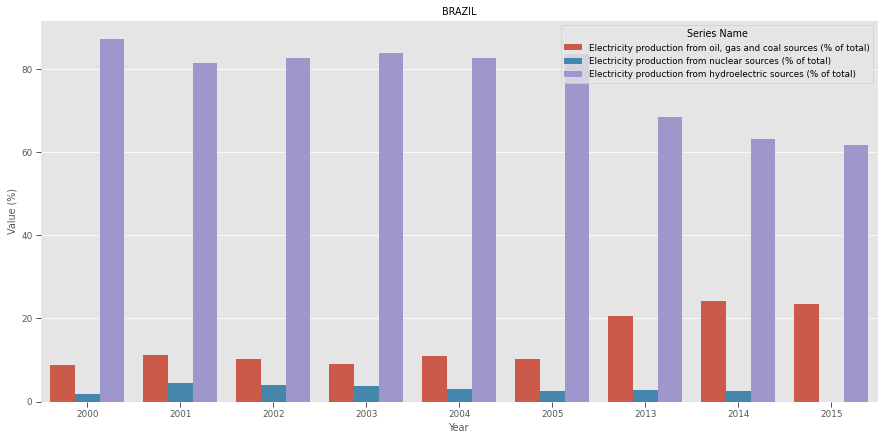

In [10]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,7))

sns.set_color_codes('dark')
cg = sns.barplot(x='Year', y='Value',
                 data=df[(df['Country Code']=='BRA')&
                         (df['Series Name']!='GDP per capita (constant 2015 US$)')&
                         (df['Series Name']!='CO2 emissions (metric tons per capita)')&
                         (df['Series Name']!='Electricity production from oil sources (% of total)')&
                         (df['Series Name']!='Electricity production from natural gas sources (% of total)')&
                         (df['Series Name']!='Electricity production from coal sources (% of total)')&
                         (df['Year']<2016)],
                 hue='Series Name')
sns.despine(left = True, bottom = True)
#plt.ticklabel_format(style='plain', axis='x')
#ax.bar_label(ax.containers[0])
#sns.despine()
ax.set_title('BRAZIL')
ax.set_ylabel('Value (%)')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

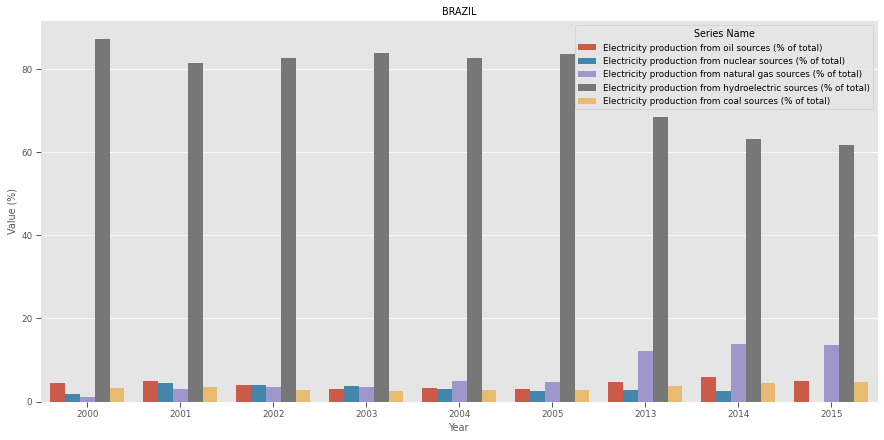

In [11]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,7))

sns.set_color_codes('dark')
cg = sns.barplot(x='Year', y='Value',
                 data=df[(df['Country Code']=='BRA')&
                         (df['Series Name']!='GDP per capita (constant 2015 US$)')&
                         (df['Series Name']!='CO2 emissions (metric tons per capita)')&
                         (df['Series Name']!='Electricity production from oil, gas and coal sources (% of total)')&
                         (df['Year']<2016)],
                 hue='Series Name')
sns.despine(left = True, bottom = True)
#plt.ticklabel_format(style='plain', axis='x')
#ax.bar_label(ax.containers[0])
#sns.despine()
ax.set_title('BRAZIL')
ax.set_ylabel('Value (%)')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

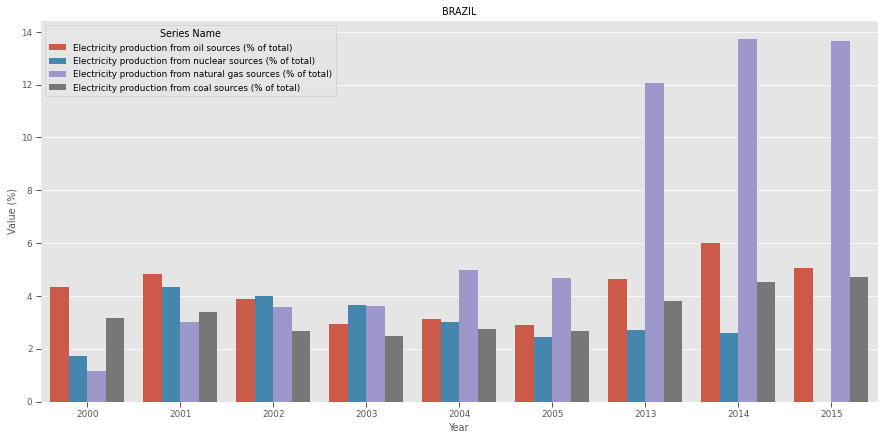

In [12]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,7))

sns.set_color_codes('dark')
cg = sns.barplot(x='Year', y='Value',
                 data=df[(df['Country Code']=='BRA')&
                         (df['Series Name']!='GDP per capita (constant 2015 US$)')&
                         (df['Series Name']!='CO2 emissions (metric tons per capita)')&
                         (df['Year']<2016)&
                         (df['Series Name']!='Electricity production from oil, gas and coal sources (% of total)')&
                         (df['Series Name']!='Electricity production from hydroelectric sources (% of total)')],
                 hue='Series Name')
sns.despine(left = True, bottom = True)
#plt.ticklabel_format(style='plain', axis='x')
#ax.bar_label(ax.containers[0])
#sns.despine()
ax.set_title('BRAZIL')
ax.set_ylabel('Value (%)')
ax.set_xlabel('Year')

In [13]:
df[df['Country Code']=='BRA'].pivot("Year", "Series Name", "Value")

Series Name,CO2 emissions (metric tons per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",GDP per capita (constant 2015 US$)
Year,,,,,,,,
2000,1.788829,3.154395,87.243988,1.165917,1.732825,4.347539,8.667851,6787.668992
2001,1.803426,3.398091,81.543220,3.020018,4.346622,4.815103,11.233212,6788.576562
2002,1.767207,2.662647,82.764247,3.588962,4.002650,3.887801,10.139410,6904.625307
2003,1.701509,2.495753,83.882318,3.598297,3.666366,2.951921,9.045971,6896.137194
2004,1.775807,2.731170,82.796365,4.971958,2.996751,3.130186,10.833314,7206.261798
2005,1.775722,2.665290,83.729372,4.667608,2.445209,2.897529,10.230428,7352.282586
2013,2.401860,3.813019,68.463446,12.082382,2.705324,4.650707,20.546108,9247.573381
2014,2.499362,4.529578,63.224984,13.726380,2.603568,5.997281,24.253239,9214.977244
2015,2.347366,4.722411,61.848494,13.666247,0.000000,5.044253,23.432912,8813.989806


<AxesSubplot:xlabel='Series Name', ylabel='Series Name'>

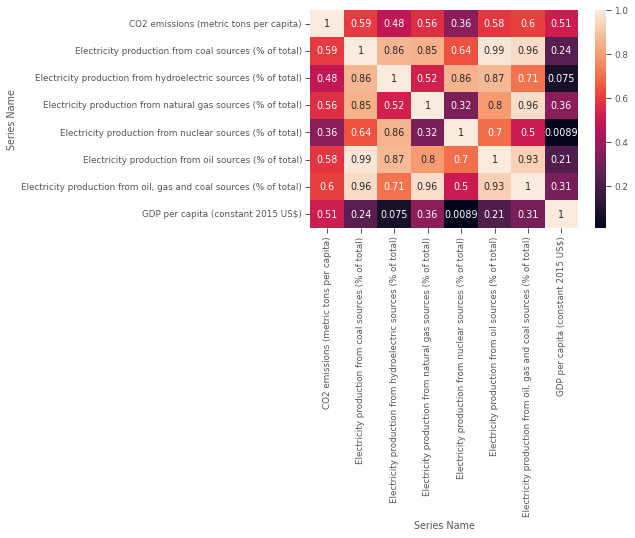

In [14]:
# Correlação
sns.heatmap(df[df['Country Code']=='BRA'].pivot("Year", "Series Name", "Value").corr(),annot=True)

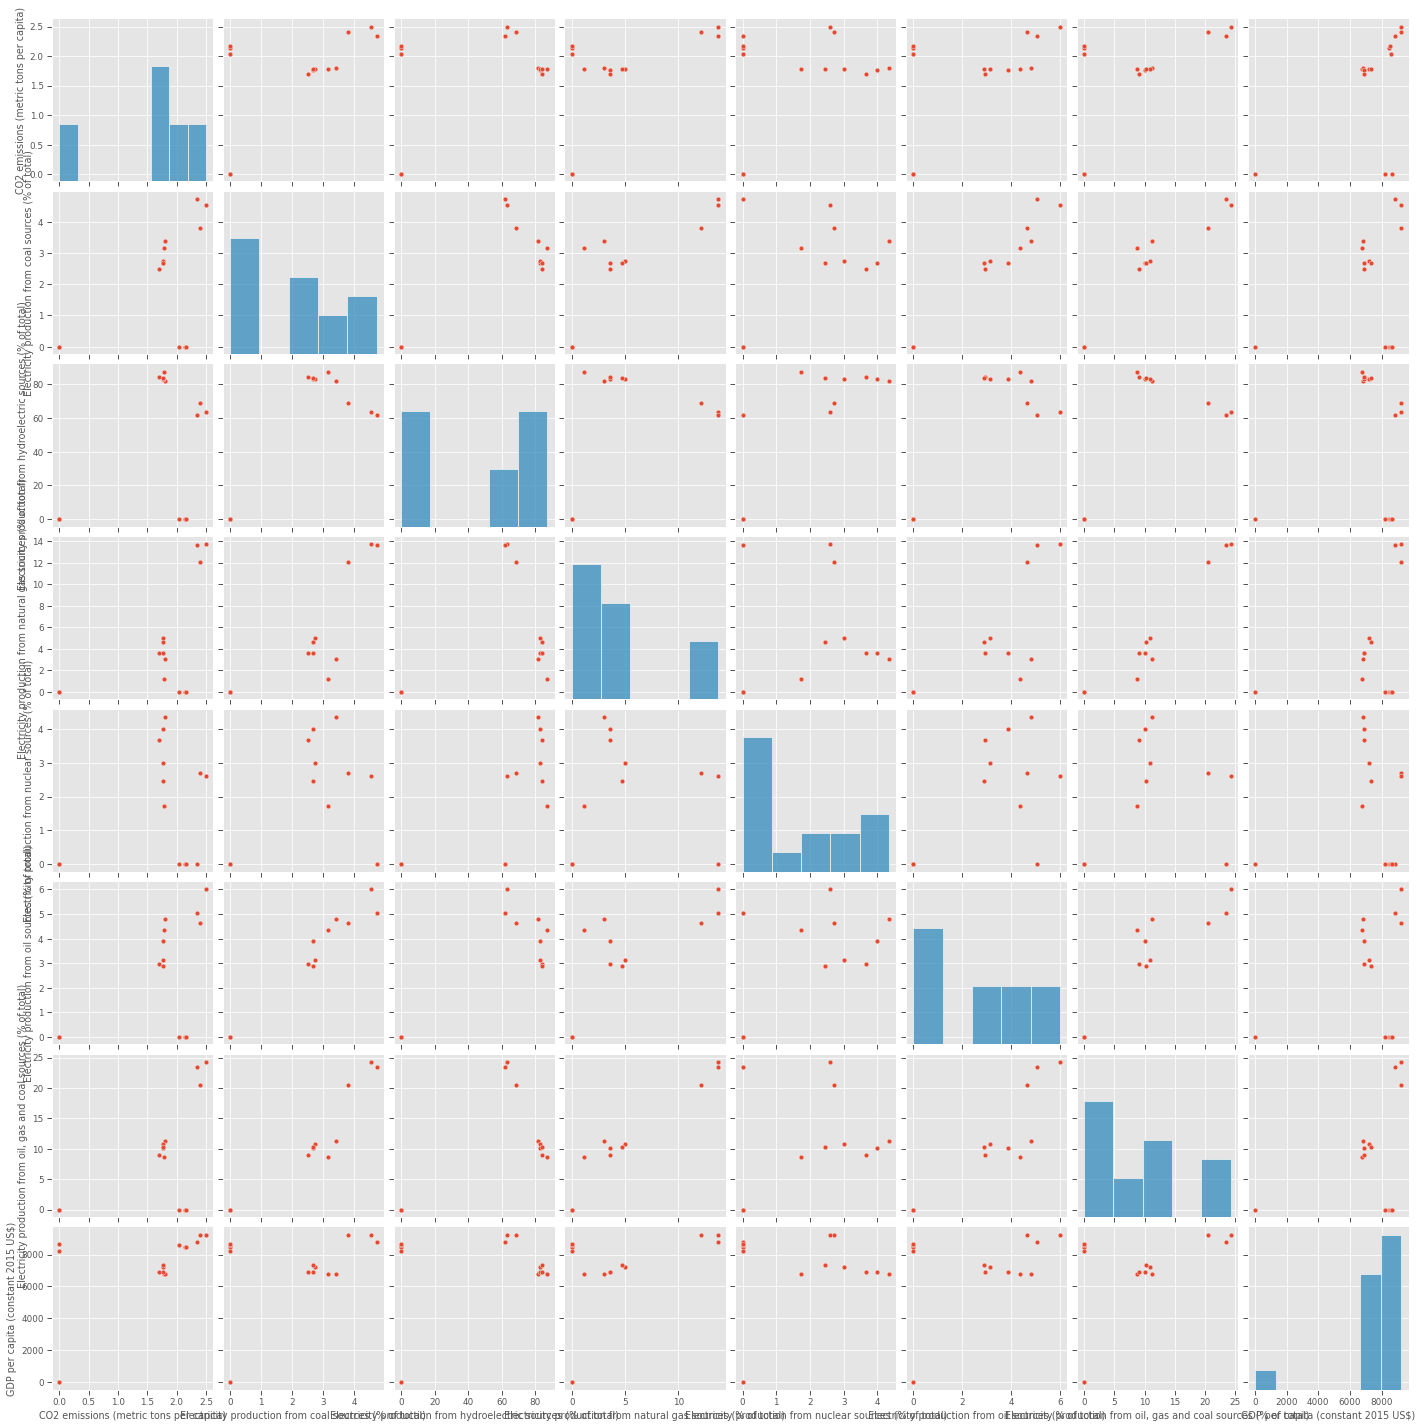

In [15]:
sns.pairplot(df[df['Country Code']=='BRA'].pivot("Year", "Series Name", "Value"))

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2 emissions (metric tons per capita)', ylabel='Density'>

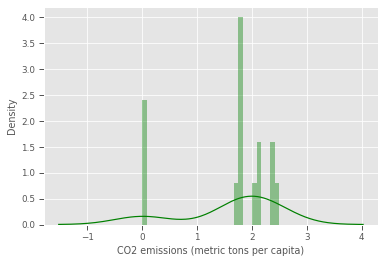

In [16]:
# densidade de Kernel
sns.distplot(df[df['Country Code']=='BRA'].pivot("Year", "Series Name", "Value")['CO2 emissions (metric tons per capita)'],color='green',bins=30)

In [17]:
grupos_de_interesse = ['European Union','Latin America & Caribbean','North America','South Asia','OECD members']

Text(0.5, 0, 'Year')

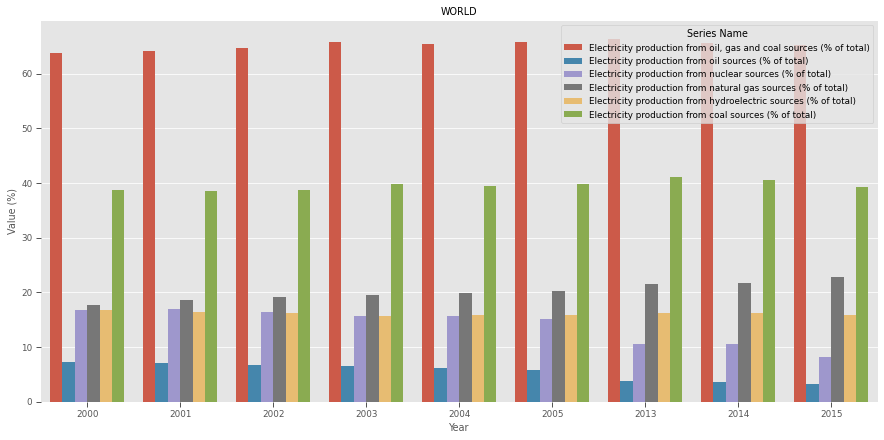

In [18]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,7))

sns.set_color_codes('dark')
cg = sns.barplot(x='Year', y='Value',
                 data=df[(df['Country Code']=='WLD')&
                         (df['Series Name']!='GDP per capita (constant 2015 US$)')&
                         (df['Series Name']!='CO2 emissions (metric tons per capita)')&
                         (df['Year']<2016)],
                 hue='Series Name')
sns.despine(left = True, bottom = True)
#plt.ticklabel_format(style='plain', axis='x')
#ax.bar_label(ax.containers[0])
#sns.despine()
ax.set_title('WORLD')
ax.set_ylabel('Value (%)')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

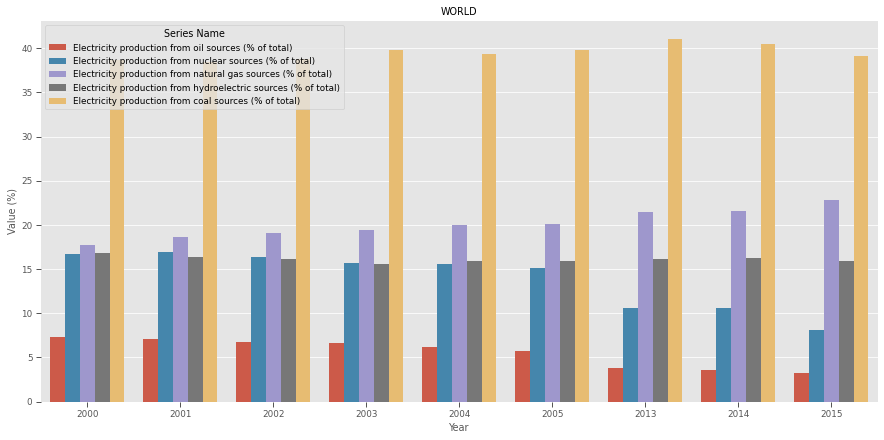

In [19]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,7))

sns.set_color_codes('dark')
cg = sns.barplot(x='Year', y='Value',
                 data=df[(df['Country Code']=='WLD')&
                         (df['Series Name']!='GDP per capita (constant 2015 US$)')&
                         (df['Series Name']!='CO2 emissions (metric tons per capita)')&
                         (df['Series Name']!='Electricity production from oil, gas and coal sources (% of total)')&
                         (df['Year']<2016)],
                 hue='Series Name')
sns.despine(left = True, bottom = True)
#plt.ticklabel_format(style='plain', axis='x')
#ax.bar_label(ax.containers[0])
#sns.despine()
ax.set_title('WORLD')
ax.set_ylabel('Value (%)')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

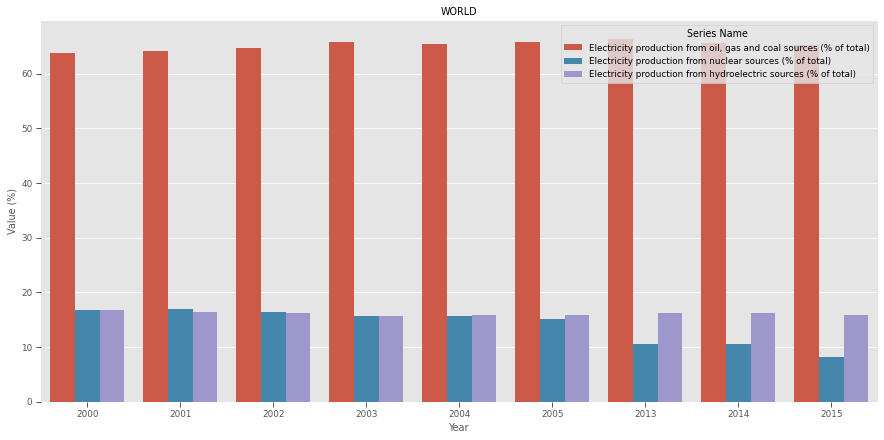

In [20]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,7))

sns.set_color_codes('dark')
cg = sns.barplot(x='Year', y='Value',
                 data=df[(df['Country Code']=='WLD')&
                         (df['Series Name']!='GDP per capita (constant 2015 US$)')&
                         (df['Series Name']!='CO2 emissions (metric tons per capita)')&
                         (df['Series Name']!='Electricity production from oil sources (% of total)')&
                         (df['Series Name']!='Electricity production from natural gas sources (% of total)')&
                         (df['Series Name']!='Electricity production from coal sources (% of total)')&
                         (df['Year']<2016)],
                 hue='Series Name')
sns.despine(left = True, bottom = True)
#plt.ticklabel_format(style='plain', axis='x')
#ax.bar_label(ax.containers[0])
#sns.despine()
ax.set_title('WORLD')
ax.set_ylabel('Value (%)')
ax.set_xlabel('Year')

<AxesSubplot:xlabel='Series Name', ylabel='Series Name'>

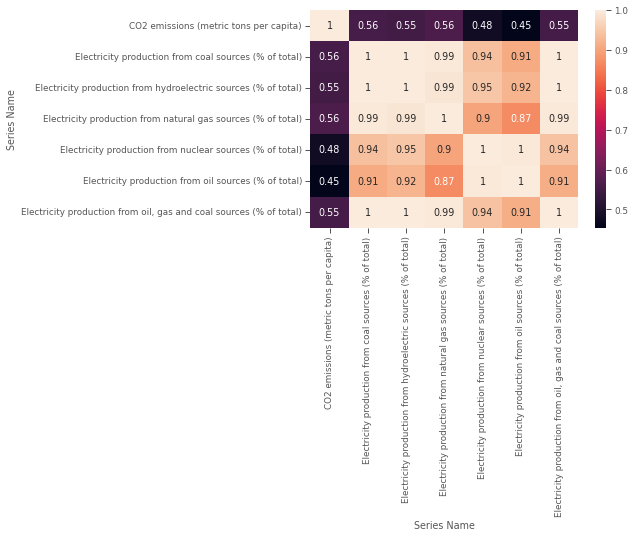

In [21]:
# Correlação
sns.heatmap(df[df['Country Code']=='WLD'].pivot("Year", "Series Name", "Value").corr(),annot=True)

Text(0.5, 0, 'Year')

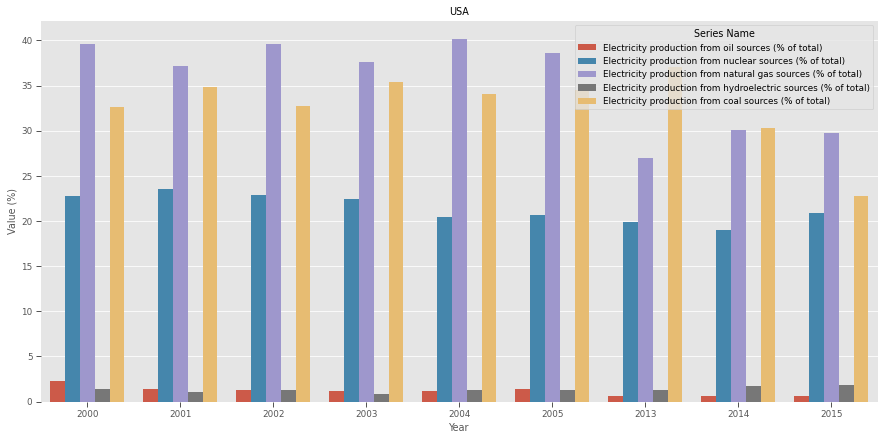

In [42]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,7))

sns.set_color_codes('dark')
cg = sns.barplot(x='Year', y='Value',
                 data=df[(df['Country Code']=='GBR')&
                         (df['Series Name']!='GDP per capita (constant 2015 US$)')&
                         (df['Series Name']!='CO2 emissions (metric tons per capita)')&
                         (df['Series Name']!='Electricity production from oil, gas and coal sources (% of total)')&
                         (df['Year']<2016)],
                 hue='Series Name')
sns.despine(left = True, bottom = True)
#plt.ticklabel_format(style='plain', axis='x')
#ax.bar_label(ax.containers[0])
#sns.despine()
ax.set_title('USA')
ax.set_ylabel('Value (%)')
ax.set_xlabel('Year')